In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats

In [92]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/954a8fb7692301e276996935d4a8267b/asset-v1:hse+STATDA+2021+type@asset+block/CandyData.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<b>Описание данных</b>
<br>– chocolate/fruity/caramel/peanutalmondy/nougat/crispedricewafer — содержит ли конфета шоколад/фруктовый ароматизатор/карамель/арахис/нугу/воздушный рис (1 – да/ 0 – нет)
<br>– hard — конфета твердая (1 – да/ 0 – нет)
<br>– bar — конфета похожа на батончик (1 – да/ 0 – нет)
<br>– pluribus — в упаковке одна конфета или несколько (1 – несколько/ 0 – одна)
<br>– sugarpercent — процент сахара в конфете
<br>– pricepercent — цена конфеты
<br>– winpercent — рейтинг конфеты

1. Выберите переменные sugarpercent, pricepercent и winpercent. Проверьте предпосылку о мультиколлинеарности

<Axes: >

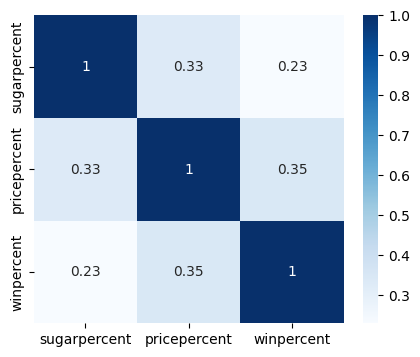

In [93]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['sugarpercent', 'pricepercent', 'winpercent']].corr(), annot=True, cmap="Blues")

2. Постройте линейную модель, где зависимой переменной выступает winpercent, а независимой – sugarpercent. Укажите, верно ли следующее утверждение: на уровне значимости 0.05 процент сахара в конфете статистически значимо влияет на рейтинг конфеты.

In [94]:
X = df['sugarpercent']
y = df['winpercent']
scipy.stats.linregress(X, y)

LinregressResult(slope=11.923863286810722, intercept=44.60944180753465, rvalue=0.22915065712800645, pvalue=0.034897896761698376, stderr=5.5596076890773345, intercept_stderr=3.0860859920175674)

In [95]:
0.22915065712800645 ** 2

0.052510023662197175

3. Постройте линейную модель, где зависимой переменной выступает winpercent, а независимыми – sugarpercent и pricepercent. Чему будет равно значение оценки коэффициента при цене конфеты? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если значение отрицательное, не забудьте указать минус перед числом.

In [96]:
X_mult = df[['sugarpercent', 'pricepercent']]
y = df['winpercent']
X_mult_constant = sm.add_constant(X_mult)

model = sm.OLS(y, X_mult_constant)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     6.353
Date:                Wed, 26 Jul 2023   Prob (F-statistic):            0.00272
Time:                        15:27:20   Log-Likelihood:                -342.53
No. Observations:                  85   AIC:                             691.1
Df Residuals:                      82   BIC:                             698.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7867      3.438     11.574      0.000      32.948      46.625
sugarpercent     6.7311      5.664      1.188      0.238      -4.536      17.998
pricepercent    15.5865      5.605      2.781      0.007       4.436      26.737
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.467
Skew:                           0.180   Prob(JB):                        0.792
Kurtosis:                       2.946   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### TEST 2

<b>2-1</b>
    <br>
Перед выполнением задания создайте переменную winpercent_0_1, которая принимает значение 1, если рейтинг конфеты больше или равен 50, и 0 в обратном случае.
<br>
Постройте логистическую модель, где зависимой переменной выступает winpercent_0_1, а независимой – sugarpercent. Выберите верную интерпретацию константы.

In [97]:
df['winpercent_0_1'] = np.where(df['winpercent'] >= 50, 1, 0)
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent_0_1
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [98]:
y = df['winpercent_0_1']
X = df['sugarpercent'] - df['sugarpercent'].mean()
X_constant = sm.add_constant(X)
model = sm.Logit(y, X_constant)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.672972
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         winpercent_0_1   No. Observations:                   85
Model:                          Logit   Df Residuals:                       83
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 0.02433
Time:                        15:27:20   Log-Likelihood:                -57.203
converged:                       True   LL-Null:                       -58.629
Covariance Type:            nonrobust   LLR p-value:                   0.09122
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1704      0.221     -0.769      0.442      -0.604       0.264
sugarpercent     1.3276      0.798      1.663      0.096      -0.237       2.892
================================================================================
"""

In [99]:
1/np.exp(-0.8058)

2.2384865719528255

In [100]:
np.exp(1.3276)

3.771979764137272

<b>2-2</b>
    <br>
Постройте логистическую модель, где зависимой переменной выступает winpercent_0_1, а независимыми – sugarpercent и pricepercent. Чему будет равено отношение шансов при цене конфеты? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой.

In [101]:
y = df['winpercent_0_1']
X = df[['sugarpercent', 'pricepercent']]
X_constant = sm.add_constant(X)
model = sm.Logit(y, X_constant)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.619123
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         winpercent_0_1   No. Observations:                   85
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.1024
Time:                        15:27:20   Log-Likelihood:                -52.625
converged:                       True   LL-Null:                       -58.629
Covariance Type:            nonrobust   LLR p-value:                  0.002470
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6935      0.580     -2.918      0.004      -2.831      -0.556
sugarpercent     0.5896      0.881      0.669      0.503      -1.137       2.316
pricepercent     2.6012      0.906      2.871      0.004       0.825       4.377
================================================================================
"""

In [102]:
np.exp(2.6012)

13.479904218413797

In [103]:
np.exp(0.5896)

1.8032669643315304

<b>2-3</b>
    <br>
Постройте логистическую модель, где зависимой переменной выступает winpercent_0_1, а независимыми – sugarpercent и pricepercent. Во сколько раз будет ниже шанс высокого рейтинга конфеты при нулевом содержании сахара и нулевом значении цены? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой.

In [104]:
np.exp(-1.6935)

0.18387483452370543

In [105]:
1/ 0.183874834

5.438482136168782

<b>2-4</b>
    <br>
Постройте логистическую модель, где зависимой переменной выступает winpercent_0_1, а независимыми – центрированные sugarpercent и pricepercent. Во сколько раз будет ниже шанс высокого рейтинга конфеты при среднем содержании сахара и среднем значении цены? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой.

In [106]:
y = df['winpercent_0_1']
X = df[['sugarpercent', 'pricepercent']] - df[['sugarpercent', 'pricepercent']].mean()
X_constant = sm.add_constant(X)
model = sm.Logit(y, X_constant)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.619123
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         winpercent_0_1   No. Observations:                   85
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.1024
Time:                        15:27:20   Log-Likelihood:                -52.625
converged:                       True   LL-Null:                       -58.629
Covariance Type:            nonrobust   LLR p-value:                  0.002470
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1916      0.235     -0.816      0.414      -0.652       0.269
sugarpercent     0.5896      0.881      0.669      0.503      -1.137       2.316
pricepercent     2.6012      0.906      2.871      0.004       0.825       4.377
================================================================================
"""

In [107]:
1 / np.exp(-0.1916)

1.2111859456788328

<b>2-5</b>
    <br>
Посмотрите на результаты двух моделей (с одной центрированной объясняющей переменной sugarpercent и с двумя центрированными объясняющими переменными sugarpercent и pricepercent. Укажите, верно ли следующее утверждение: у модели с большим количеством объясняющих переменных качество выше. Обратите внимание на на псевдо R-квадрат.




1 переменная Pseudo R-squ.: 0.02433
2 переменных Pseudo R-squ.:	0.1024

Экзаменационный вариант

1. Аналитик Арсений специализируется в применениях методов машинного обучения и статистики для областей сельского хозяйства. Он решает задачу классификации типа почвы и хочет построить модель для разделения чернозёма и прочих типов. Для этого он использует данные по содержанию гуминовых кислот в кДа (acidG) и фульвокислот в кДа (acidF) в образцах почвы. Он оценил логистическую регрессию на обучающей выборке.
Оказалось, что уравнение оценённой модели выглядит следующим образом: 
<br>
$
\hat{P}(y_i = Chernozem) = \sigma(0.00 - 0.01 \times G_i + 0.2 \times acidF_i)
$
<br>
где 
<br>
$
\sigma(⋅) $– логистическая функция.
$
y_i $– значение целевой переменной для наблюдения i
<br>
Пусть имеется образец почвы с содержанием гуминовых кислот 15 кДа и фульвокислот 4 кДа. Найдите оценку вероятности принадлежности этого образца к чернозёму, которую выдаст модель Арсения. Ответ округлите до сотых.

In [108]:
p_hat = 0 - 0.01* 15 + 0.2 * 4
p_hat

0.65

In [109]:
np.exp(0.65) / (1 + np.exp(0.65))

0.6570104626734988

2. Ниже приведены данные об уровнях осадков в двух различных регионах России, измеренные за одинаковые промежутки времени.
<br>Регион 1: [103.01, 101.99, 105.21, 106.80, 112.70, 106.13, 110.48, 109.26, 100.44, 100.28]
<br>Регион 2: [107.38, 106.31, 106.00, 105.27, 105.27, 104.66, 103.70, 105.07, 105.12, 104.74]
<br>Предполагая, что все необходимые предпосылки выполнены, дисперсии генеральных совокупностей равны, а выборки независимы, проверьте гипотезу о равенстве средних уровней осадков при помощи t-теста на уровне значимости 5%. Выберите верное утверждение.

In [110]:
reg_1 = np.array([103.01, 101.99, 105.21, 106.80, 112.70, 106.13, 110.48, 109.26, 100.44, 100.28])
reg_2 = np.array([107.38, 106.31, 106.00, 105.27, 105.27, 104.66, 103.70, 105.07, 105.12, 104.74])
scipy.stats.ttest_ind(reg_1, reg_2)

Ttest_indResult(statistic=0.2003211139915275, pvalue=0.8434753569984761)

In [111]:
reg_1.mean()

105.63

In [112]:
reg_2.mean()

105.352

2. Выберите две переменные, между которыми возможно рассчитать интерпретируемый выборочный коэффициент корреляции Пирсона, и вычислите этот коэффициент по приведённым данным. Ответ округлите до сотых.
<br><b>Переменные:</b>
<br>Цвет автомобиля, закодированный числами (1 – синий, 2 – красный, 3 – зелёный): [1, 1, 2, 3, 2].
<br>Истинный объём бака автомобиля (л): [50.1, 53.2, 55.0, 55.0, 50.2].
<br>Пройденный километраж (тыс. км): [15.2, 4.75, 1.2, 1.9, 9.3].

In [113]:
vol = np.array([50.1, 53.2, 55.0, 55.0, 50.2])
path = np.array([15.2, 4.75, 1.2, 1.9, 9.3])
np.corrcoef(vol, path)

array([[ 1.      , -0.936005],
       [-0.936005,  1.      ]])

2. Бабушка Афросинья хочет проверить, существует ли зависимость между сортом баклажана и типом почвы, в которую сорт был высажен. Для этого она собрала данные по 150 сортам, высаженных в чернозём, и 150 сортам, высаженных в каштановую почву. Данные представлены в таблице ниже.
|                     | Алмаз | Матросик | Снежный |
|:-------------------:|:-----:|:--------:|:-------:|
|  Чернозёмная почва  |  75   |    20    |    55   |
|  Каштановая почва   |  20   |    120   |    10   |

    
    <br>Рассчитайте статистику 
    $\chi^2$-критерия согласия Пирсона и выпишите её в ответ, округлив до сотых.

In [114]:
df = pd.DataFrame({'Чернозёмная почва': [75, 20, 55], 'Каштановая почва': [20, 120, 10]}, index=['Алмаз', 'Матросик', 'Снежеый'])
df

,Чернозёмная почва,Каштановая почва
Алмаз,75,20
Матросик,20,120
Снежеый,55,10


In [116]:
scipy.stats.chi2_contingency(df, correction=False)

Chi2ContingencyResult(statistic=134.4245228455755, pvalue=6.457817206943715e-30, dof=2, expected_freq=array([[47.5, 47.5],
       [70. , 70. ],
       [32.5, 32.5]]))

In [117]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/b0131e36bdd129a2928b807590f27e0b/asset-v1:hse+STATDA+2021+type@asset+block/c.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Файл содержит данные о рейтингах видео-игр по данным Metacritic. Набор данных содержит следующие переменные:
<br>– Name — название игры
<br>– Platform — конфета твердая (1 – да/ 0 – нет)
<br>– Year_of_Release — год запуска игры
<br>– Genre — жанр игры
<br>– Publisher — компания, выпустившая игру
<br>– NA_Sales — продажи в Северной Америке (миллионы копий)
<br>– EU_Sales — продажи в Европейском Союзе (миллионы копий)
<br>– JP_Sales — продажи в Японии (миллионы копий)
<br>– Other_Sales — продажи в прочих странах (миллионы копий)
<br>– Global_Sales — общие продажи по миру (миллионы копий)
<br>– Critic_Score — агрегированный рейтинг команды Metacritic
<br>– Critic_Count — количество экспертов, участвовавших в расчёте User_Score
<br>– User_Score — агрегированный рейтинг пользователей Metacritic
<br>– User_Count — количество пользователей, участвовавших в расчёте User_Score
<br>– Developer — разработчик игры
<br>– Rating — рейтинг ESRB (Everyone, Teen, Adults Only, ...)

Вопрос 1. Вычислите среднее по продажам в Северной Америке (в миллионах копий) – переменная NA_Sales. Введите ответ в виде десятичной дроби, округлите до сотых.

In [118]:
df['NA_Sales'].mean()

0.26333034272384714

<Axes: >

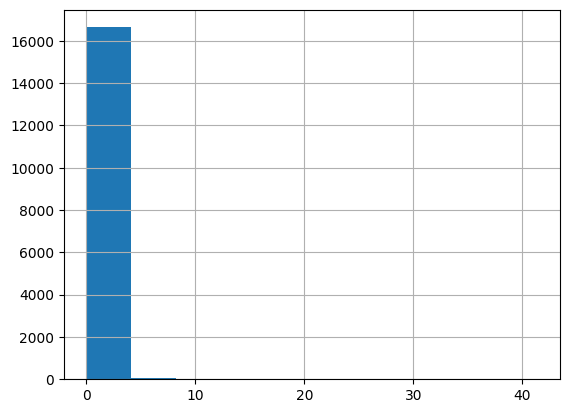

In [119]:
df['NA_Sales'].hist()

In [120]:
df['NA_Sales'].std()

0.8135138347516192

Вопрос 2. Определите наиболее часто встречающийся жанр игр. В ответ запишите жанр (например, Simulation)

In [121]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Вопрос 3. Добавьте в таблицу новый признак Platform_Coded, который будет представлять собой закодированное название платформы для запуска игры. Кодировку проведите следующим образом: если платформа – это PS3, то код равен 1, а если любая другая, то код равен 0. Выведите среднее по признаку Platform_Coded. Введите ответ в виде десятичной дроби, округлите до сотых.

In [122]:
df['Platform_Coded'] = np.where(df['Platform'] == 'PS3', 1, 0)
df['Platform_Coded'].mean()

0.07961002452299779

Вопрос 4. Вычислите средний агрегированный рейтинг команды Metacritic для игр, выпущенных (published) компаниями Tecmo Koei или Wanadoo. Введите ответ в виде десятичной дроби, округлите до сотых.

In [123]:
df[(df['Publisher'] == 'Tecmo Koei') | (df['Publisher'] == 'Wanadoo')]['Critic_Score'].mean()

65.60135135135135

Вопрос 5. Определите количество пропущенных значений признака, содержащего информацию о названиях разработчиков игр (переменная Developer). Введите ответ в виде целого числа.

In [124]:
df['Developer'].isna().sum()

6623

Вопрос 6. Определите количество пропущенных значений признака, содержащего информацию о названиях разработчиков игр (переменная Developer). Замените пропущенные значения этого признака на моду по этому признаку и сохраните полученный признак без пропущенных значений в отдельную переменную, не включаемую в исходную таблицу. Выпишите количество значений этой переменной, равных её моде. Введите ответ в виде целого числа.

In [125]:
mode = df['Developer'].value_counts().reset_index().iloc[0,0]

In [126]:
df['Developer_new'] = df['Developer'].fillna(mode)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Coded,Developer_new
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,0,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,0,Ubisoft
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,0,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,0,Ubisoft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,1,Ubisoft
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,Ubisoft
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,Ubisoft
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,Ubisoft


In [127]:
df['Developer_new'].value_counts()

Ubisoft                                   6827
EA Sports                                  172
EA Canada                                  167
Konami                                     162
Capcom                                     139
                                          ... 
Genki, Kojima Productions                    1
Warner Bros. Interactive Entertainment       1
THQ, Altron                                  1
Netherock Ltd.                               1
Interchannel-Holon                           1
Name: Developer_new, Length: 1696, dtype: int64

Вопрос 7. Постройте диаграмму рассеяния для переменных Critic_Score (на горизонтальной оси) и EU_Sales (на вертикальной оси). Выберите все верные утверждения.

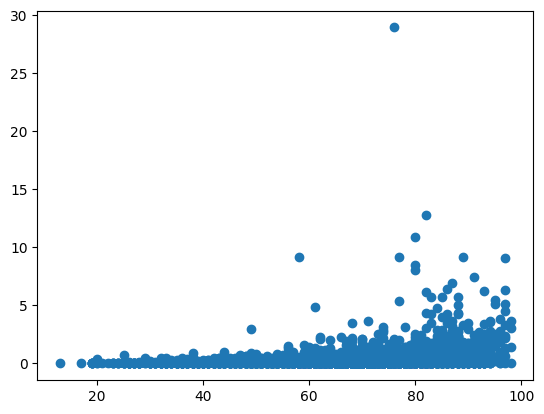

In [128]:
plt.scatter(df['Critic_Score'], df['EU_Sales'])

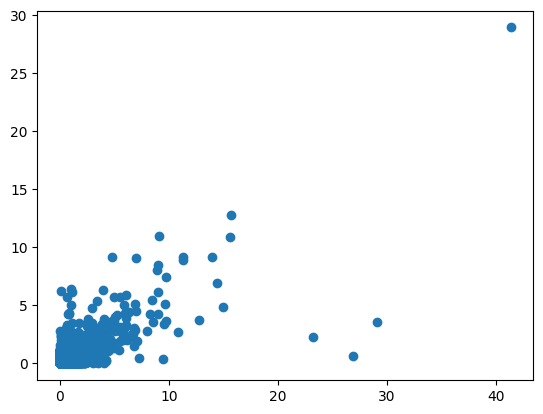

In [130]:
plt.scatter(df['NA_Sales'], df['EU_Sales'])

Вопрос 8. Выведите корреляционную матрицу для числовых переменных. Найдите переменную, которая имеет наибольшую по модулю корреляцию с переменной EU_Sales (не включая саму EU_Sales). Введите ответ в виде десятичной дроби, округлите до сотых.

In [131]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()

C:\Users\KDK\AppData\Local\Temp\ipykernel_15340\1094579899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
NA_Sales,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


Вопрос 9.
Оцените линейную регрессию, уравнение которой имеет следующий вид:
<br>
$Global\_Salels_i=\hat{w}_0+ \hat{w}_1 ln(1+NA\_Sales_i)$,
<br>
где нижние индексы обозначают значения соответствующих переменных для наблюдения i
В ответ выпишите оценку коэффициента при свободном члене. Введите ответ в виде десятичной дроби, округлите до сотых.

In [134]:
X = sm.add_constant(df['NA_Sales'])
y = df['Global_Sales']
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.293e+05
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:00:48   Log-Likelihood:                -12911.
No. Observations:               16719   AIC:                         2.583e+04
Df Residuals:                   16717   BIC:                         2.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0620      0.004     14.571      0.000       0.054       0.070
NA_Sales       1.7905      0.005    359.561      0.000       1.781       1.800
==============================================================================
Omnibus:                    10179.171   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39800095.599
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                     242.012   Cond. No.                         1.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""